<a href="https://colab.research.google.com/github/mrcoding16/Reinforment_Learning/blob/main/KArmedBandit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step: 1 Action chosen:  3 Reward obtained  1.250371074082857
Step: 2 Action chosen:  3 Reward obtained  -0.3873537611531376
Step: 3 Action chosen:  3 Reward obtained  -1.2875108905770256
Step: 4 Action chosen:  3 Reward obtained  -0.2745892293237877
Step: 5 Action chosen:  3 Reward obtained  1.1295717669622762
Step: 6 Action chosen:  3 Reward obtained  0.839264025617154
Step: 7 Action chosen:  3 Reward obtained  1.8203464417199529
Step: 8 Action chosen:  3 Reward obtained  0.42370145074798904
Step: 9 Action chosen:  3 Reward obtained  -0.16194725528321918
Step: 10 Action chosen:  3 Reward obtained  0.91673899363682
Estimated Q-values: [-2.42591279 -1.64447741  0.42685926]
True Means: [ 0.31409916 -1.69141623 -0.07985825]
Average Reward: 0.42685926164298793


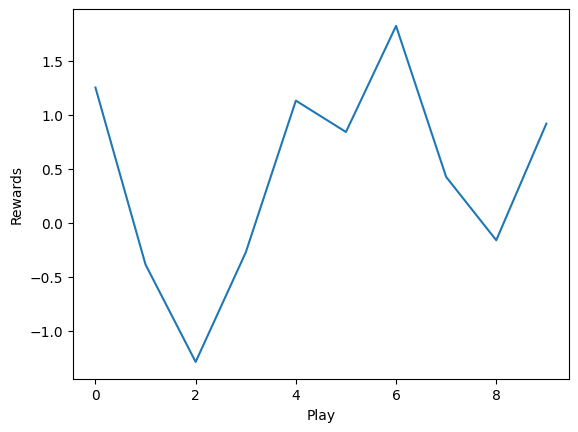

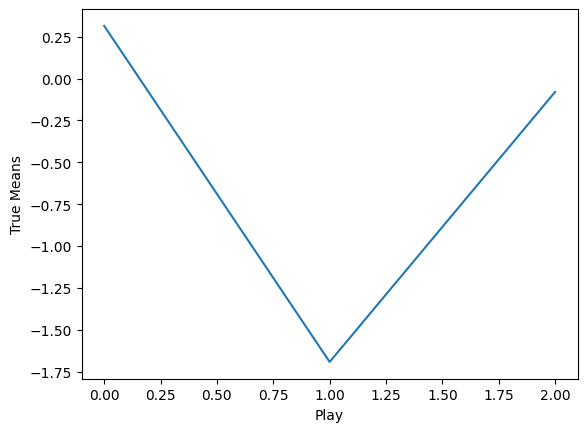

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

class KArmedBandit:
    def __init__(self, k, true_means, initial_estimates):
        self.k = k
        self.true_means = true_means
        self.q_estimates = initial_estimates
        self.action_counts = np.zeros(k)

    def select_action(self):
        return np.argmax(self.q_estimates)  # Exploit

    def update_estimate(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1 / self.action_counts[action]  # Step-size for update
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])

    def play(self, num_episodes):
        rewards_per_episode = []
        for episode in range(num_episodes):
            action = self.select_action()
            reward = np.random.normal(self.true_means[action], 1)  # True mean with noise
            self.update_estimate(action, reward)
            rewards_per_episode.append(reward)
            print("Step:", episode+1, "Action chosen: ", action+1, "Reward obtained ", reward)
        return rewards_per_episode

# Define the number of arms (slot machines) and their true means
k = 3
true_means = np.random.normal(0, 1, k)
estimates=np.random.normal(0, 1, k)

# Create a KArmedBandit instance
bandit = KArmedBandit(k, true_means,estimates)

# Play the bandit problem for a certain number of episodes
num_episodes = 10
rewards = bandit.play(num_episodes)

# Print the estimated q-values and true means
print("Estimated Q-values:", bandit.q_estimates)
print("True Means:", true_means)

# Print the average reward obtained over all episodes
print("Average Reward:", np.mean(rewards))

plt.plot(rewards)
plt.ylabel('Rewards')
plt.xlabel('Play')
plt.show()
plt.plot(true_means)
plt.ylabel('True Means')
plt.xlabel('Play')
plt.show()